In [1]:
import os, sys
dir2 = os.path.abspath('')
dir1 = os.path.dirname(dir2)
if not dir1 in sys.path: sys.path.append(dir1)

In [120]:
from common import *
from sklearn.neural_network import MLPClassifier
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, homogeneity_score
from sklearn.metrics import adjusted_mutual_info_score

In [3]:
np.random.seed(0)

In [4]:
import warnings; warnings.simplefilter('ignore')

In [5]:
# Dataset Phone Price
x_train, x_test, y_train, y_test = read_dataset(path_to_file="../Data/dataset2/train.csv")

In [6]:
# price_range = df[['income']].to_numpy()
y_test[y_test<=1] = 0
y_test[y_test>=2] = 1
y_train[y_train<=1] = 0
y_train[y_train>=2] = 1

In [7]:
# preventing information about the distribution of the test set leaking into your model
standard_scaler = StandardScaler()
x_train_scaled = standard_scaler.fit_transform(x_train)
x_test_scaled = standard_scaler.fit_transform(x_test)
y_train_scaled = standard_scaler.fit_transform(y_train).astype('int')
y_test_scaled = standard_scaler.fit_transform(y_test).astype('int')

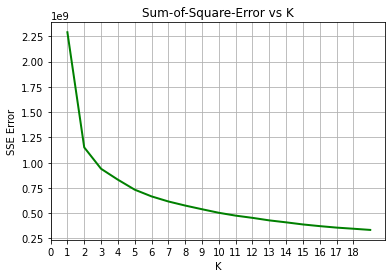

In [8]:
# Elbow Plot to obtain optimal K
sse = {}
for cluster in np.arange(1, 20):
    kmeans = KMeans(n_clusters=cluster, max_iter=1000, random_state=0, n_jobs=-1).fit(x_train)
    sse[cluster] = kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), color="green", lw=2)
plt.title("Sum-of-Square-Error vs K")
plt.xlabel("K")
plt.ylabel("SSE Error")
plt.xticks(np.arange(len(sse)))
plt.grid()
plt.show()

In [139]:
# K = 2 for PhonePrice Dataset
K = 2
x_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
1520,1883,0,1.6,0,9,0,24,0.1,87,1,16,203,915,3563,17,10,3,0,0,0
64,702,0,2.6,1,2,1,9,0.7,141,3,3,504,1570,2955,10,4,19,1,0,0
1431,1283,1,0.7,1,0,1,27,0.2,80,4,6,1135,1923,3957,17,15,6,1,0,0
926,1496,1,1.9,1,13,0,38,0.1,126,4,14,501,506,1927,17,4,6,0,0,1
983,1175,1,1.3,0,2,0,19,0.3,164,7,9,873,1394,1944,9,4,9,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1937,1396,1,0.6,0,0,0,37,0.7,134,4,15,560,1177,2694,18,3,19,0,0,1
1818,837,0,2.4,1,1,0,51,0.2,104,5,15,638,1831,594,16,6,20,1,0,1
724,696,0,0.5,0,6,0,51,0.3,197,3,8,649,907,2630,18,8,9,0,0,1
1160,1159,0,2.7,0,13,1,28,0.2,80,8,18,378,751,2495,10,0,9,1,1,1


In [157]:
# Clustering without Dimensionality Reduction
clf = KMeans(n_clusters=K, n_init=50, max_iter=1000, random_state=0, n_jobs=-1).fit(x_train)
start_time = time.time()
print(f"KNN Normal Model: Fit Time: {time.time() - start_time}")
start_time = time.time()
y_pred = clf.predict(x_test)
print(f"KNN Normal Model: Fit Time: {time.time() - start_time}")
print(f"Score of Model Tree are (Mean Accuracy of test and train data): {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

KNN Normal Model: Fit Time: 4.4345855712890625e-05
KNN Normal Model: Fit Time: 0.002334117889404297
Score of Model Tree are (Mean Accuracy of test and train data): 0.9121212121212121
              precision    recall  f1-score   support

           0       0.92      0.91      0.92       176
           1       0.90      0.91      0.91       154

    accuracy                           0.91       330
   macro avg       0.91      0.91      0.91       330
weighted avg       0.91      0.91      0.91       330



In [11]:
# Print Silhouette, Inertia and AMI for best K
k = KMeans(n_clusters=K, max_iter=1000, random_state=0, n_jobs=-1).fit(x_train)
ss = silhouette_score(x_train, y_train, metric='euclidean', sample_size=None, random_state=0)
print(f"K=2, Silhouette Score: {ss}")
print(f"K=2, Inertia: {k.inertia_}")
print(f"K=2, Adjusted Mutual Info (AMI) Score: {adjusted_mutual_info_score(y_train['price_range'], k.labels_)}")

K=2, Silhouette Score: 0.35982591486554766
K=2, Inertia: 732935561.730327
K=2, Adjusted Mutual Info (AMI) Score: 0.3834920797885445


In [49]:
# Print Silhouette, Inertia and AMI for range of different K
s = {}
h = {}
for i in range(2, 20):
    clf = KMeans(n_clusters=i, n_init=50, max_iter=1000, random_state=0, n_jobs=-1).fit(x_train)
    s[i] = silhouette_score(x_train, clf.labels_, metric="euclidean")
    h[i] = homogeneity_score(y_train['price_range'].values, clf.labels_)

[0 0 0 ... 0 0 0]
[1 1 1 ... 2 2 1]
[2 1 1 ... 3 3 2]
[3 1 1 ... 0 0 3]
[3 0 0 ... 1 1 3]
[5 1 3 ... 1 0 5]
[1 5 6 ... 5 2 1]
[4 2 6 ... 2 0 4]
[8 6 3 ... 1 9 1]
[2 0 5 ... 3 3 7]
[ 0  2  4 ...  3  3 11]
[ 0  2  4 ...  3  3 11]
[ 9 11  7 ... 10  2  1]
[14 12  7 ...  3 10  2]
[ 7  8 14 ...  8 12  2]
[12 13  9 ...  1  1 11]
[10  0 15 ... 16 16 12]
[15  2  7 ... 12 17 14]


In [66]:
sdf = pd.DataFrame(list(s.values()), columns=['Silhouette'])
sdf['Homogeneity'] = pd.DataFrame(list(h.values()))

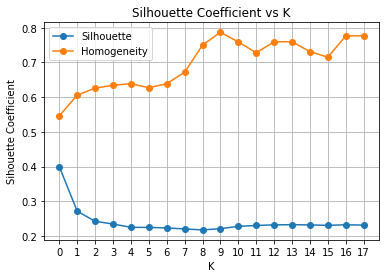

In [67]:
plt.figure()
plt.title('Silhouette & Homogeneity Scores vs K')
plt.plot(sdf, 'o-')
plt.xlabel('K')
plt.ylabel('Scores')
plt.xticks(range(sdf.shape[0]))
plt.grid()
plt.legend(sdf.columns)
plt.show()

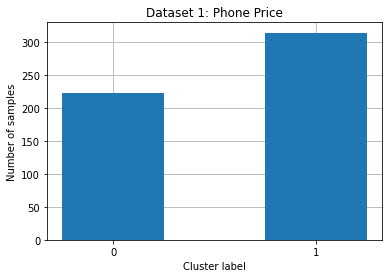

In [114]:
# plt.figure()
plt.hist(k.labels_, bins=np.arange(0, K + 1) - 0.5, rwidth=0.5, zorder=2)
plt.xticks(np.arange(0, K))
plt.xlabel('Cluster label')
plt.ylabel('Number of samples')
plt.title('Dataset 1: Phone Price')
plt.grid()

In [20]:
x_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
1520,1883,0,1.6,0,9,0,24,0.1,87,1,16,203,915,3563,17,10,3,0,0,0
64,702,0,2.6,1,2,1,9,0.7,141,3,3,504,1570,2955,10,4,19,1,0,0
1431,1283,1,0.7,1,0,1,27,0.2,80,4,6,1135,1923,3957,17,15,6,1,0,0
926,1496,1,1.9,1,13,0,38,0.1,126,4,14,501,506,1927,17,4,6,0,0,1
983,1175,1,1.3,0,2,0,19,0.3,164,7,9,873,1394,1944,9,4,9,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1937,1396,1,0.6,0,0,0,37,0.7,134,4,15,560,1177,2694,18,3,19,0,0,1
1818,837,0,2.4,1,1,0,51,0.2,104,5,15,638,1831,594,16,6,20,1,0,1
724,696,0,0.5,0,6,0,51,0.3,197,3,8,649,907,2630,18,8,9,0,0,1
1160,1159,0,2.7,0,13,1,28,0.2,80,8,18,378,751,2495,10,0,9,1,1,1


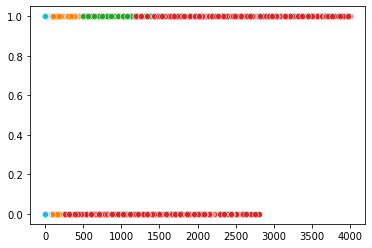

In [14]:
for c in list(x_train.columns):
    sns.scatterplot(x_train[c].values, y_train["price_range"].values)

### Gaussian Mixture to implement Expectation Maximization

In [91]:
s_em = {}
h_em = {}
l_em = {}
for i in range(2, 20):
    clf_gm = GaussianMixture(n_components=i, n_init=50, max_iter=100, random_state=0).fit(x_train)
    labels = clf_gm.predict(x_train)
    print(labels)
    s_em[i] = silhouette_score(x_train, labels, metric="euclidean")
    h_em[i] = homogeneity_score(y_train['price_range'].values, labels)
    l_em[i] = clf_gm.score(x_train)

[1 1 1 ... 1 1 1]
[1 0 0 ... 1 0 0]
[0 2 2 ... 0 2 2]
[1 4 4 ... 1 4 4]
[0 3 3 ... 0 3 3]
[5 0 0 ... 5 0 0]
[5 7 7 ... 5 7 7]
[7 0 0 ... 7 0 0]
[5 1 1 ... 5 1 1]
[ 1 10 10 ...  1 10 10]
[9 1 1 ... 9 1 1]
[1 4 4 ... 1 4 4]
[8 0 0 ... 5 0 0]
[5 5 5 ... 5 5 5]
[10 10 10 ... 10 10  1]
[3 3 3 ... 3 3 3]
[11  5  8 ...  3  5  5]
[18 18 18 ... 18 18 18]


In [94]:
gm_df = pd.DataFrame(list(s_em.values()), columns=['Silhouette'])
gm_df['Homogeneity'] = pd.DataFrame(list(h_em.values()))
gm_df['Likelihood'] = pd.DataFrame(list(l_em.values()))

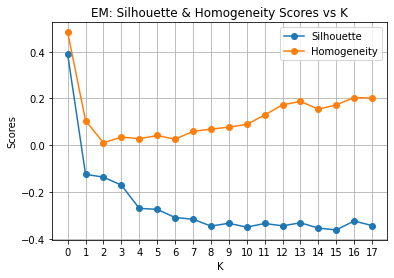

In [100]:
plt.figure()
plt.title('EM: Silhouette & Homogeneity Scores vs K')
plt.plot(gm_df[['Silhouette', 'Homogeneity']], 'o-')
plt.xlabel('K')
plt.ylabel('Scores')
plt.xticks(range(gm_df.shape[0]))
plt.grid()
plt.legend(sdf.columns)
plt.show()

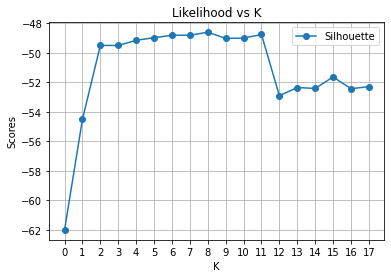

In [98]:
plt.figure()
plt.title('Likelihood vs K')
plt.plot(gm_df[['Likelihood']], 'o-')
plt.xlabel('K')
plt.ylabel('Scores')
plt.xticks(range(gm_df.shape[0]))
plt.grid()
plt.legend(sdf.columns)
plt.show()

In [177]:
# Classification Report
gm = GaussianMixture(n_components=2, max_iter=100, random_state=0, n_init=50).fit(x_train)
labels = gm.predict(x_test)
print(f"Accuracy Score: {accuracy_score(y_test, labels)}")
print(classification_report(y_test, labels))

Accuracy Score: 0.896969696969697
              precision    recall  f1-score   support

           0       0.91      0.90      0.90       176
           1       0.88      0.90      0.89       154

    accuracy                           0.90       330
   macro avg       0.90      0.90      0.90       330
weighted avg       0.90      0.90      0.90       330



In [115]:
# MLPClassifier on PhonePrice

In [189]:
# Obtain centroids via KMeans
clf_k = KMeans(n_clusters=2, n_init=50, max_iter=1000,random_state=0, n_jobs=-1).fit(x_train)
df_x_train = pd.DataFrame(clf_k.labels_, columns=['labels'])
clf_k_test = KMeans(n_clusters=2, n_init=50, max_iter=1000,random_state=0, n_jobs=-1).fit(x_test)
df_x_test = pd.DataFrame(clf_k_test.labels_, columns=['labels'])

In [190]:
clf_mlp = MLPClassifier()
clf_mp = clf_mlp.fit(df_x_train, y_train)
y_pred = clf_mlp.predict(df_x_test)
print(f"Accuracy Score: {accuracy_score(y_pred, y_test)}")
print(classification_report(y_test, y_pred))

Accuracy Score: 0.9151515151515152
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       176
           1       0.93      0.89      0.91       154

    accuracy                           0.92       330
   macro avg       0.92      0.91      0.91       330
weighted avg       0.92      0.92      0.92       330



In [133]:
scores = cross_val_score(clf_mlp, df_l, y_train, scoring='f1_weighted', cv=10)

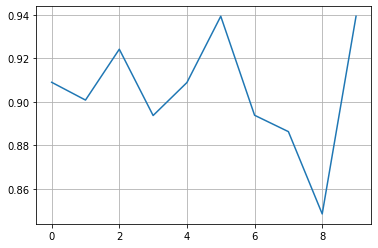

In [193]:
plt.plot(scores)
plt.grid()

In [182]:
df_x_train.shape

(1320, 1)

In [183]:
x_test.shape

(330, 20)